# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []

In [4]:
# Get latitude and temperature for cities
# set up lists to hold reponse info
# records = 0-50
# sets = 1-15,,
record_counter = 0
set_counter = 0
records = []
sets = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

print(f"-------------------")
print(f"Getting your Data")
print(f"-------------------")

# get a loop going
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        
    except:
        print(f"City not found. Skipping...")
        pass
    
print("-------------")
print("Completed")
print("-------------")    

-------------------
Getting your Data
-------------------
Processing record 1 of set 0 | ladario
Processing record 2 of set 0 | nantucket
Processing record 3 of set 0 | ostrovnoy
Processing record 4 of set 0 | matara
Processing record 5 of set 0 | kaitangata
Processing record 6 of set 0 | beringovskiy
Processing record 7 of set 0 | san cristobal
Processing record 8 of set 0 | asau
City not found. Skipping...
Processing record 9 of set 0 | gobabis
Processing record 10 of set 0 | san angelo
Processing record 11 of set 0 | mataura
Processing record 12 of set 0 | fort nelson
Processing record 13 of set 0 | flinders
Processing record 14 of set 0 | sentyabrskiy
City not found. Skipping...
Processing record 15 of set 0 | severo-kurilsk
Processing record 16 of set 0 | busselton
Processing record 17 of set 0 | cherskiy
Processing record 18 of set 0 | bredasdorp
Processing record 19 of set 0 | narsaq
Processing record 20 of set 0 | tuatapere
Processing record 21 of set 0 | khatanga
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data_dict = {
                "City": cities,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": Humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": temp_max,
                "Wind Speed": wind_speed
                }
weather_data = pd.DataFrame({k: pd.Series(l) for k, l in weather_data_dict.items()})
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ladario,76.0,PT,1.578370e+09,95.0,40.70,-7.74,7.22,1.79
1,nantucket,1.0,US,1.578370e+09,73.0,41.28,-70.10,4.00,5.70
2,ostrovnoy,32.0,RU,1.578369e+09,96.0,68.05,39.51,-12.63,2.75
3,matara,20.0,BI,1.578369e+09,94.0,-3.48,29.48,20.00,1.42
4,kaitangata,0.0,NZ,1.578369e+09,50.0,-46.28,169.85,15.00,6.71


In [6]:
weather_data.count

<bound method DataFrame.count of              City  Cloudiness Country          Date  Humidity    Lat     Lng  \
0         ladario        76.0      PT  1.578370e+09      95.0  40.70   -7.74   
1       nantucket         1.0      US  1.578370e+09      73.0  41.28  -70.10   
2       ostrovnoy        32.0      RU  1.578369e+09      96.0  68.05   39.51   
3          matara        20.0      BI  1.578369e+09      94.0  -3.48   29.48   
4      kaitangata         0.0      NZ  1.578369e+09      50.0 -46.28  169.85   
..            ...         ...     ...           ...       ...    ...     ...   
608          zeya         NaN     NaN           NaN       NaN    NaN     NaN   
609        boueni         NaN     NaN           NaN       NaN    NaN     NaN   
610     champasak         NaN     NaN           NaN       NaN    NaN     NaN   
611      etchojoa         NaN     NaN           NaN       NaN    NaN     NaN   
612  monte alegre         NaN     NaN           NaN       NaN    NaN     NaN   

     M

In [7]:
weather_data.to_csv("city_weather.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

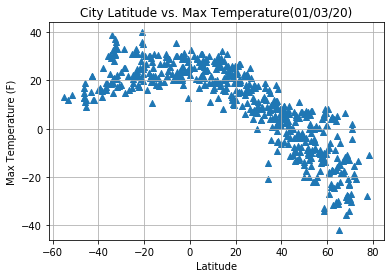

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="^")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature(01/03/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

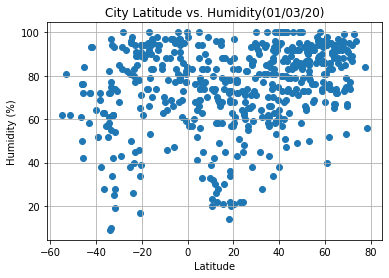

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity(01/03/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

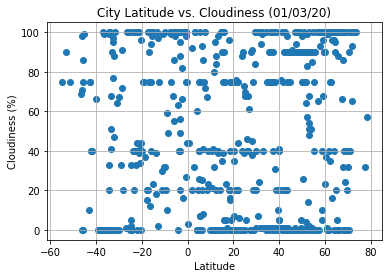

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (01/03/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

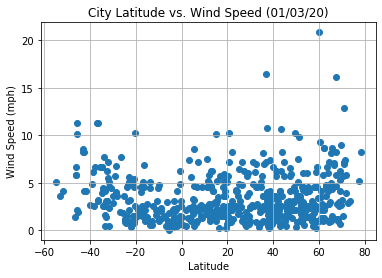

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed (01/03/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Lat_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [12]:
def LinearRegressionplot(x_values, y_values):
# Perform a linear regression on Max Temp vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    reg = x_values * slope + intercept
# Create line equation string
    equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(line_eq,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()


In [13]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [16]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [18]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [19]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [20]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [21]:
x_values = Sorthern_Hemisphere["Lat"]
y_values = Sorthern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

NameError: name 'stats' is not defined